In [186]:
import pandas as pd
import numpy as np

In [187]:
data = pd.read_csv("data/marketing_campaign.csv", sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [189]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

### Feature Engineering

- Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
- Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.
- Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
- Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
- To get further clarity of household, Creating feature indicating "Family_Size"
- Create a feature "Is_Parent" to indicate parenthood status
- Create three categories in the "Education" by simplifying its value counts.
- Dropping some of the redundant features

In [190]:
data["Age"] = 2024 -  data["Year_Birth"]
data["Age"].head()

0    67
1    70
2    59
3    40
4    43
Name: Age, dtype: int64

In [191]:
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

In [192]:
print(data["Marital_Status"].unique())
data["Living_With"] = data["Marital_Status"].replace({'Single':'Alone', 'Together':'Partner', 'Married':'Partner', 'Divorced':'Alone', 'Widow':'Alone', 'Alone':'Alone','Absurd':'Alone', 'YOLO':'Alone'})
data["Living_With"]

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


0         Alone
1         Alone
2       Partner
3       Partner
4       Partner
         ...   
2235    Partner
2236    Partner
2237      Alone
2238    Partner
2239    Partner
Name: Living_With, Length: 2216, dtype: object

In [193]:
data["children"] = data["Kidhome"]+data["Teenhome"]
data["children"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: children, Length: 2216, dtype: int64

In [194]:
data["Family_size"] = data["Living_With"].replace({'Alone':1, 'Partner':2}) + data["children"] 
data["Family_size"].head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18076\3304544262.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Family_size"] = data["Living_With"].replace({'Alone':1, 'Partner':2}) + data["children"]


0    1
1    3
2    2
3    3
4    3
Name: Family_size, dtype: int64

In [195]:
data["Is_Parent"] = np.where(data["children"]>0, 1, 0)

In [196]:
print(data["Education"].unique())
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [197]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data = data.drop(to_drop+cols_del, axis=1)

In [198]:
s=(data.dtypes == "object")
cols = list(s[s].index)
cols


['Education', 'Living_With']

In [199]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    data[col] = le.fit_transform(data[col])


In [200]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cleaned_data = pd.DataFrame(sc.fit_transform(data), columns= data.columns)
cleaned_data

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,children,Family_size,Is_Parent
0,-0.894187,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,1.428553,2.504712,-0.554143,0.693232,0.986443,1.675488,-1.348829,-1.264803,-1.758673,-1.581389
1,-0.894187,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,-1.125881,-0.571082,-1.169518,-0.131574,1.236801,-0.962358,-1.348829,1.405806,0.450009,0.632356
2,-0.894187,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,1.428553,-0.229327,1.291982,-0.543978,0.318822,0.280250,0.741384,-1.264803,-0.654332,-1.581389
3,-0.894187,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,-0.760962,-0.912837,-0.554143,0.280829,-1.266777,-0.919224,0.741384,0.070501,0.450009,0.632356
4,0.569268,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,0.333796,0.112428,0.061232,-0.131574,-1.016420,-0.307044,0.741384,0.070501,0.450009,0.632356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,-0.894187,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,...,1.793473,0.112428,-0.554143,-0.131574,0.151917,1.217598,0.741384,0.070501,0.450009,0.632356
2212,0.569268,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,...,1.428553,-0.229327,-0.246455,0.693232,1.904422,-0.270546,0.741384,2.741110,2.658691,0.632356
2213,-0.894187,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,...,-0.760962,0.112428,2.215044,0.280829,-1.016420,1.051696,-1.348829,-1.264803,-1.758673,-1.581389
2214,0.569268,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,...,0.698715,0.795937,1.291982,-0.956381,1.069896,0.391404,0.741384,0.070501,0.450009,0.632356


In [201]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data_dr = pd.DataFrame(pca.fit_transform(cleaned_data),columns=["pc1","pc2","pc3"])
data_dr.head()

,pc1,pc2,pc3
0,4.968145,-0.340239,1.112334
1,-2.854163,0.141897,0.750895
2,2.588044,-0.685691,-0.140955
3,-2.550543,-1.325431,-1.184021
4,-0.656340,0.287940,-1.255697


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


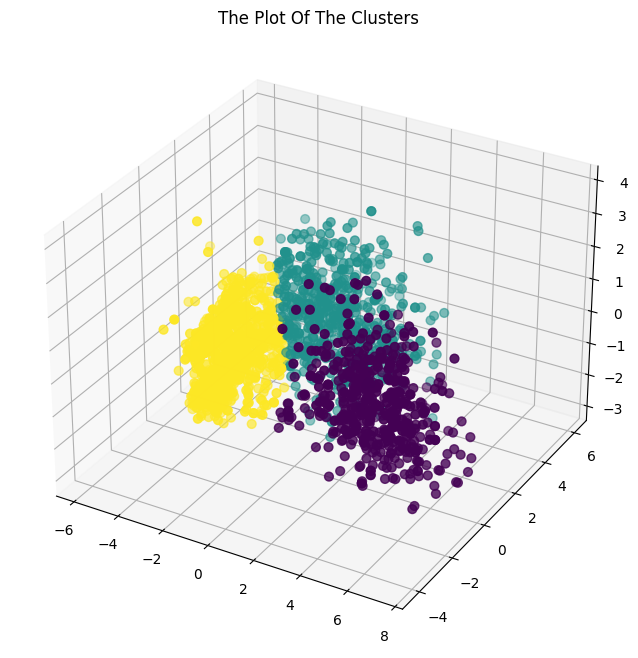

In [202]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=3)
kmeans.fit_transform(data_dr)
labels = kmeans.labels_

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(data_dr["pc1"], data_dr["pc2"], data_dr["pc3"], s=40, c=labels, marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18076\966574979.py:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(data, x="Income", hue=labels, palette=sns.color_palette())
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Income', ylabel='Density'>

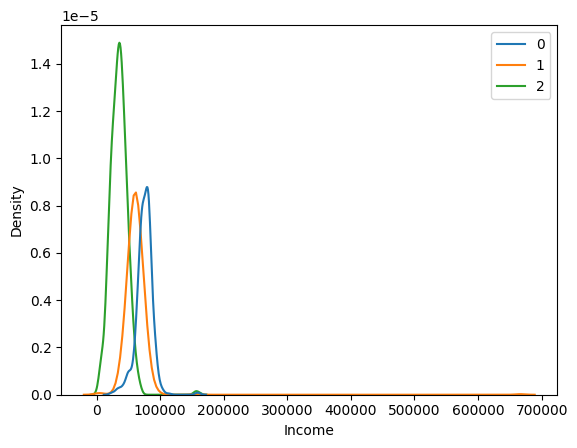

In [203]:
import seaborn as sns

sns.kdeplot(data, x="Income", hue=labels, palette=sns.color_palette())

C:\Users\Asus\AppData\Local\Temp\ipykernel_18076\688070959.py:1: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(data, x="Age", hue=labels, palette=sns.color_palette())
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Age', ylabel='Density'>

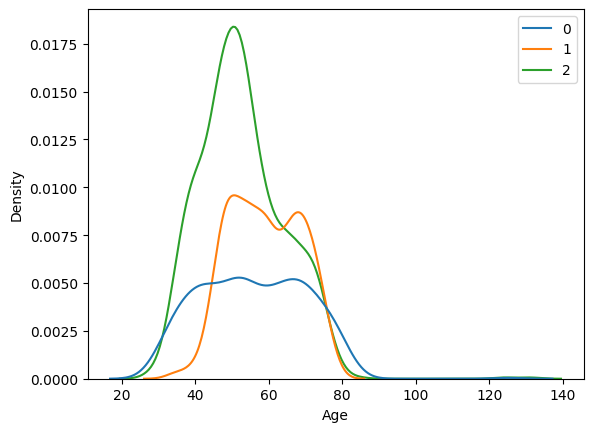

In [204]:
sns.kdeplot(data, x="Age", hue=labels, palette=sns.color_palette())

C:\Users\Asus\AppData\Local\Temp\ipykernel_18076\3362690279.py:1: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(data, x="children", hue=labels, palette=sns.color_palette())
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='children', ylabel='Density'>

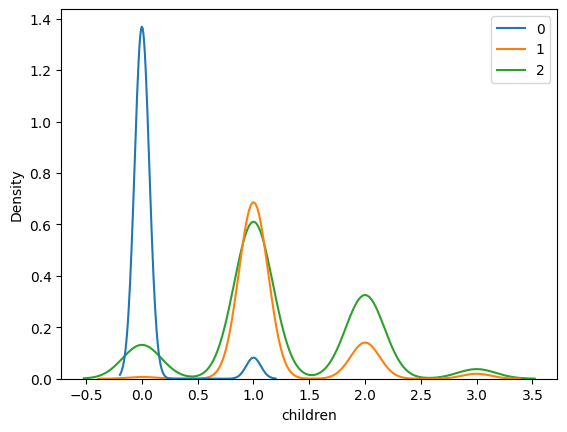

In [205]:
sns.kdeplot(data, x="children", hue=labels, palette=sns.color_palette())

C:\Users\Asus\AppData\Local\Temp\ipykernel_18076\3560465193.py:1: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(cleaned_data, x="Spent", hue=labels, palette=sns.color_palette())
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Spent', ylabel='Density'>

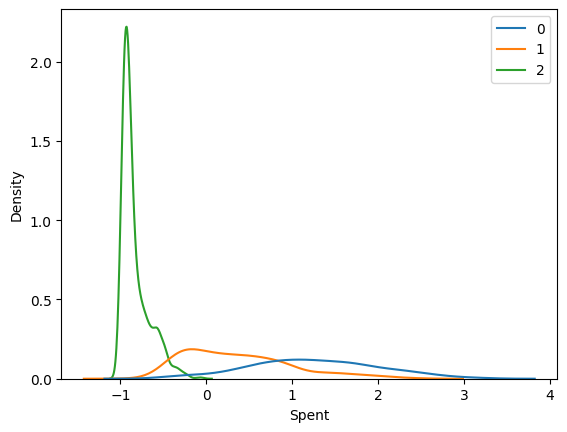

In [206]:
sns.kdeplot(cleaned_data, x="Spent", hue=labels, palette=sns.color_palette())